In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
import warnings

# Question 1:

●	Briefly describe the importance of time series forecasting models for business applications that can be used in a particular scenario and explain this by providing at least two examples.

●	Your goal is to forecast based on the use of the experimental data provided at the above-mentioned link  to create time series machine learning models for forecasting the appliances energy usage in a low energy building.

●	Use an appropriate train/test split to develop a model, and determine its forecast errors. Evaluate the performance in the context of the dataset. 


Briefly describe the importance of time series forecasting models for business applications that can be used in a particular scenario and explain this by providing at least two examples.

####################

ANSWER

Time series forecasting models are of significant importance in business for a number of reasons.

The application of demand forecasting models enables businesses to anticipate future product demand, thereby facilitating optimal inventory management and supply chain optimization. Such models assist businesses in forecasting future product demand, thereby facilitating the management of inventory and the optimisation of supply chains.

Financial planning is also facilitated by the use of time series forecasting models. Such models assist in the prediction of revenue, expenses and cash flows, which is essential for the formulation of budgets and financial plans.

The following example scenarios illustrate the potential applications of time series forecasting in various business contexts.

The retail sector employs time series forecasting to predict daily sales, thereby optimising stock levels and reducing the likelihood of overstock or stockouts.

The energy sector can also benefit from the use of time series forecasting. An energy provider utilises electricity demand forecasting in order to efficiently manage grid loads and schedule maintenance.

Your goal is to forecast based on the use of the experimental data provided at the above-mentioned link  to create time series machine learning models for forecasting the appliances energy usage in a low energy building.

Use an appropriate train/test split to develop a model, and determine its forecast errors. Evaluate the performance in the context of the dataset. 

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
# The 'date' column is being converted to a datetime format in order to facilitate analysis using time series functionality.
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.shape

(19735, 29)

In [5]:
df.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

Conlcusion

The prevalence of 0s in the dataset indicates the absence of missing values. Therefore, no further processing of missing values is required.

The presence of the term "false" indicates that no instances of duplicate data exist.

Handle missing values

In [6]:
any(df.duplicated())

False

In [7]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Exploratory data analysis

Given that the target variable in the dataset is the electricity consumption of household appliances (hereafter referred to as 'Appliances'), it is plausible that other features, such as temperature, may exert an influence upon it. However, it can be reasonably assumed that there is a direct correlation between electricity consumption and time. For instance, it is reasonable to posit that electricity usage in the evening will be higher than during the day, given the typical use of lighting and the prevalence of other household activities, such as watching television. Conversely, the target variable should be at its lowest from midnight to early morning, as most people are asleep, resulting in minimal electricity usage.

Accordingly, in order to more accurately observe the distribution of the target variable over time, the following variables have been introduced.

In [8]:
df2 = df.copy()
df2

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [9]:
# Converting date into datetime
df2['date'] = df2['date'].astype('datetime64[ns]')
df2['Date'] = pd.to_datetime(df2['date']).dt.date
df2['Time'] = pd.to_datetime(df2['date']).dt.time
df2['hour'] = df2['date'].dt.hour
df2['month'] = df2['date'].dt.month
df2['day_of_week'] = df2['date'].dt.dayofweek

df2= df2.drop(["date"], axis=1)
df2

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Windspeed,Visibility,Tdewpoint,rv1,rv2,Date,Time,hour,month,day_of_week
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,7.000000,63.000000,5.300000,13.275433,13.275433,2016-01-11,17:00:00,17,1,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.666667,59.166667,5.200000,18.606195,18.606195,2016-01-11,17:10:00,17,1,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.333333,55.333333,5.100000,28.642668,28.642668,2016-01-11,17:20:00,17,1,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.000000,51.500000,5.000000,45.410389,45.410389,2016-01-11,17:30:00,17,1,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,5.666667,47.666667,4.900000,10.084097,10.084097,2016-01-11,17:40:00,17,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,3.333333,23.666667,13.333333,43.096812,43.096812,2016-05-27,17:20:00,17,5,4
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,3.500000,24.500000,13.300000,49.282940,49.282940,2016-05-27,17:30:00,17,5,4
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,3.666667,25.333333,13.266667,29.199117,29.199117,2016-05-27,17:40:00,17,5,4
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,3.833333,26.166667,13.233333,6.322784,6.322784,2016-05-27,17:50:00,17,5,4


Overview of the entire dataset.

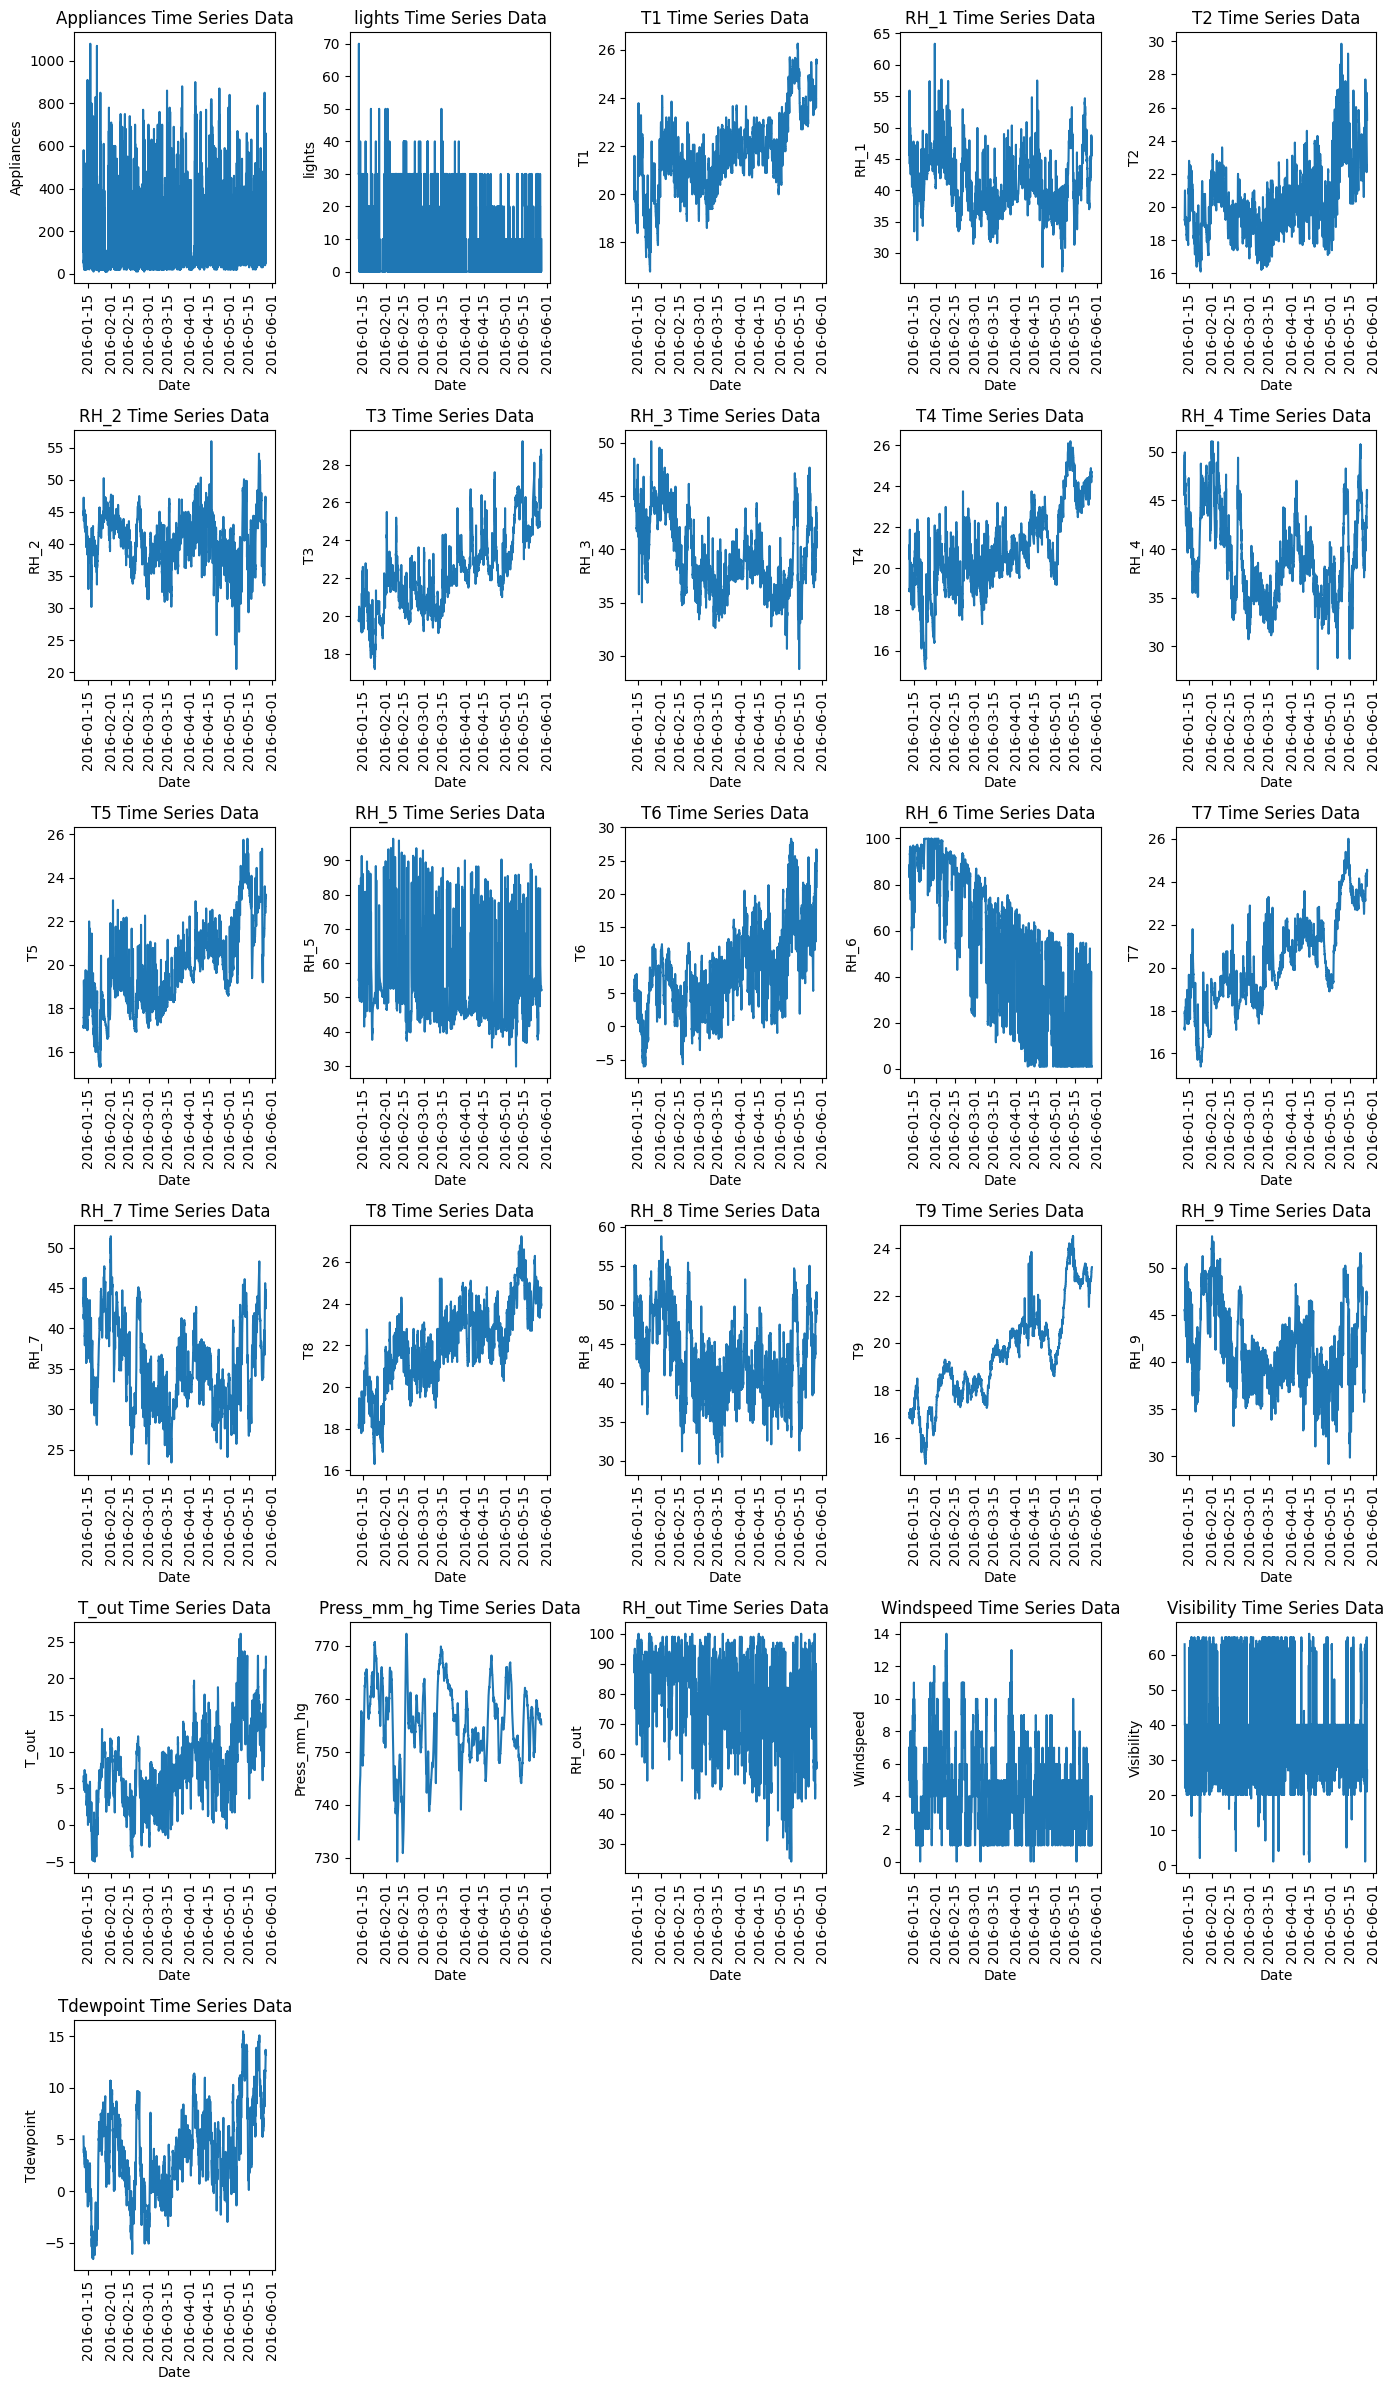

In [10]:
# Filtering columns excluding 'rv1' and 'rv2'
selected_columns = [col for col in df.columns if col not in ['rv1', 'rv2', 'date']]

# Determining the number of rows needed for the subplots
num_cols = len(selected_columns)
num_rows = (num_cols + 4) // 5  # ceil division for rows

# Creating subplots
fig, axs = plt.subplots(num_rows, 5, figsize=(14, num_rows * 4))

# Flattening the axs array for easier iteration
axs = axs.flatten()

# Looping through selected columns and plot time series on subplots
for idx, var in enumerate(selected_columns):
    sns.lineplot(data=df, x='date', y=var, ax=axs[idx], linewidth=1.5)
    axs[idx].set_xlabel('Date')
    axs[idx].set_ylabel(var)
    axs[idx].set_title(f'{var} Time Series Data')
    axs[idx].tick_params(axis='x', rotation=90)

# Turning off any unused subplots
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

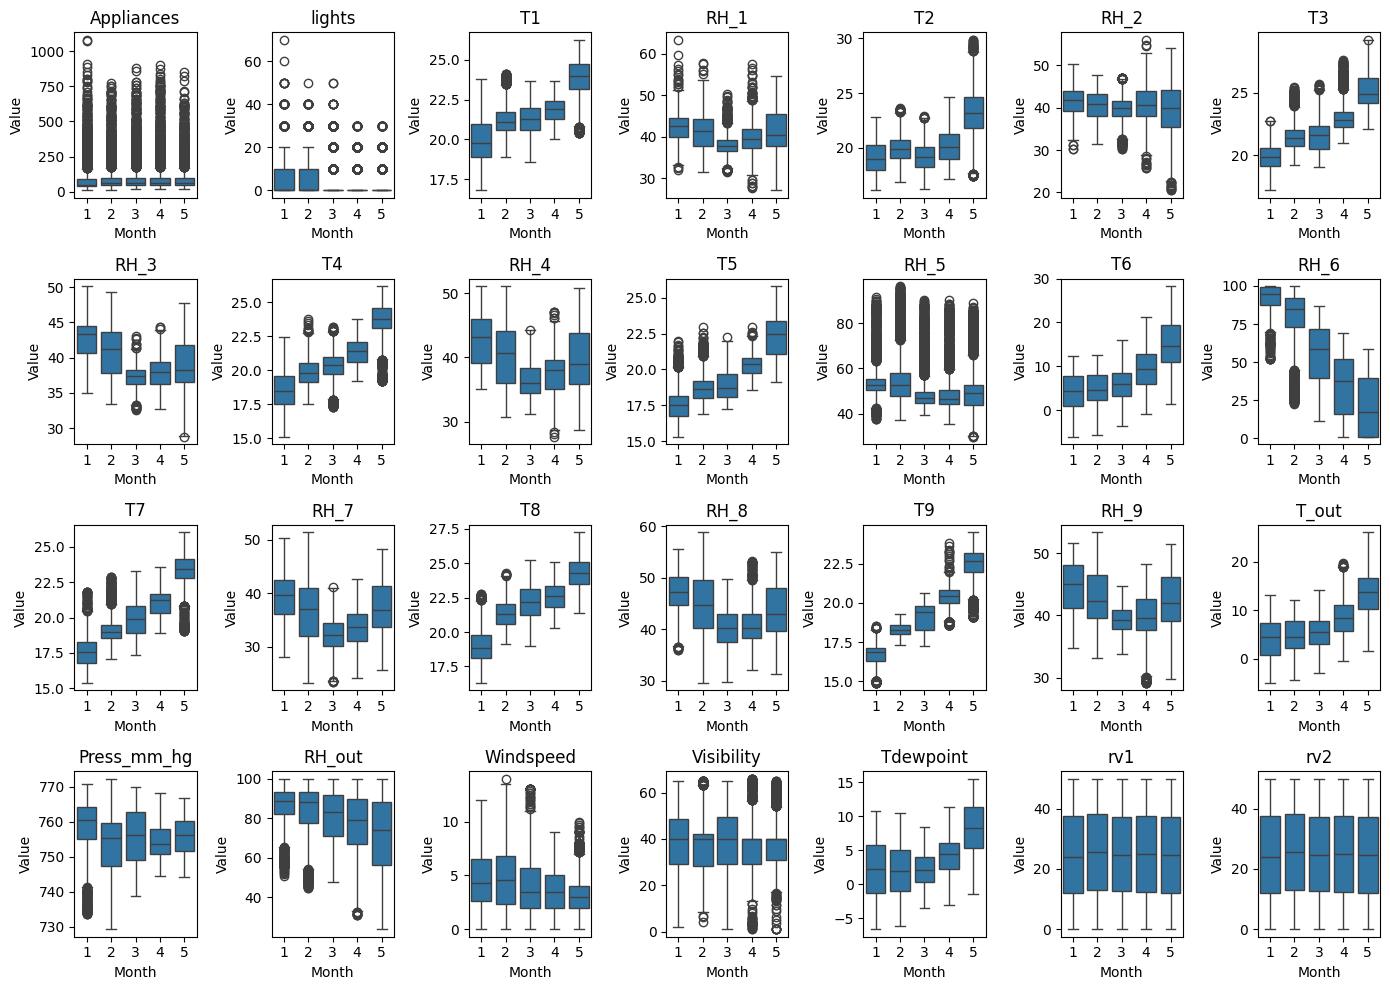

In [11]:
# Extracting numerical columns from the data
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 
             'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

# Create subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for i, col in enumerate(numerical):
    ax = axs[i]
    sns.boxplot(x=df['date'].dt.month, y=df[col], ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Month')
    ax.set_ylabel('Value')

# Turn off any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

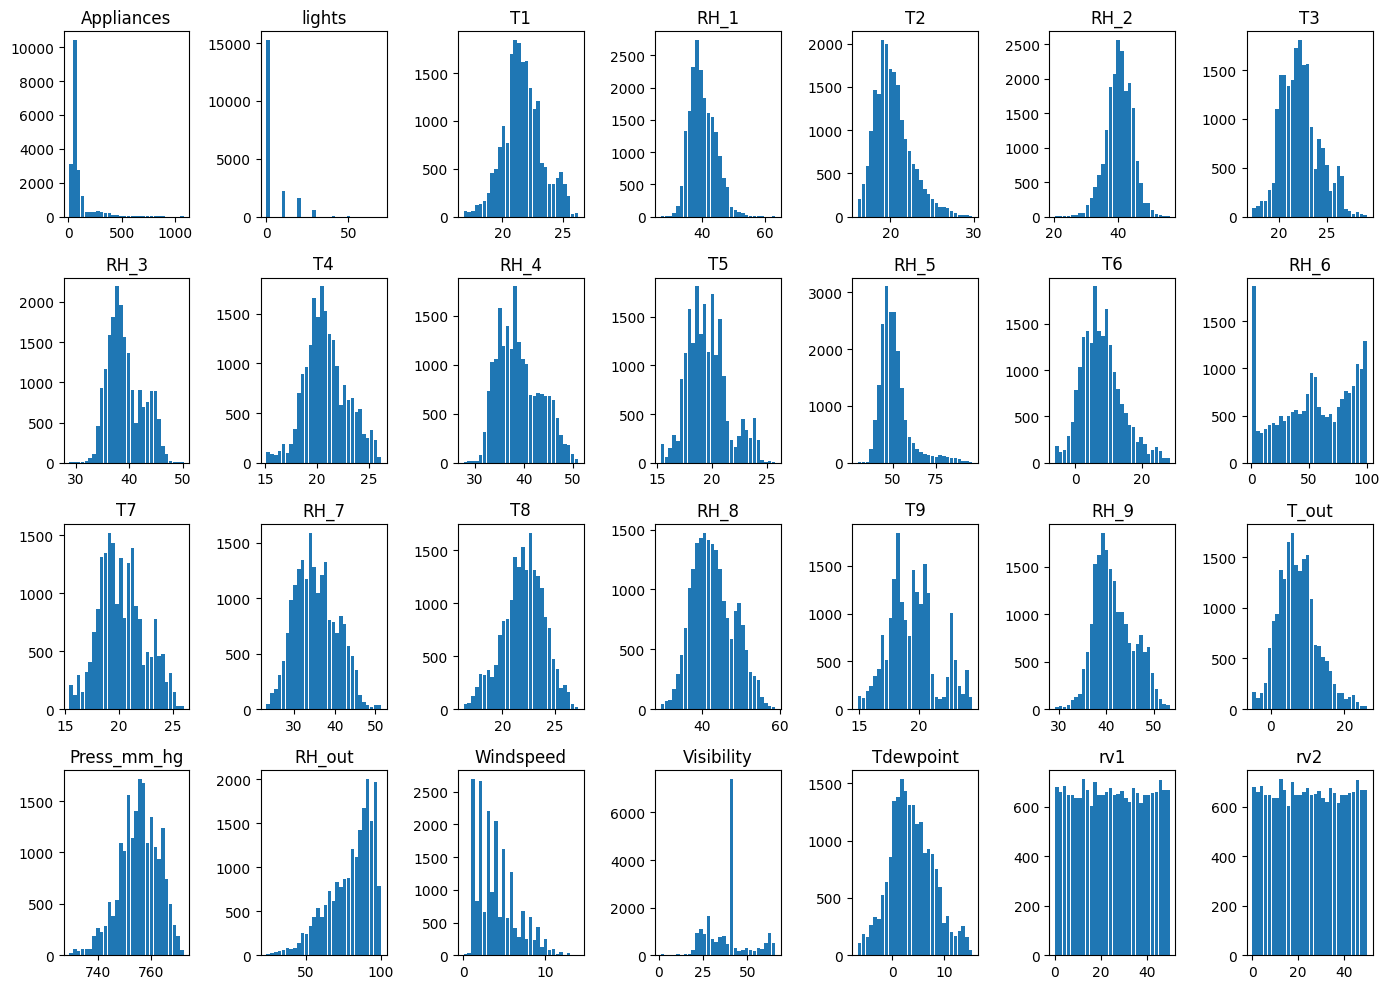

In [12]:
# Extracting numerical columns from the data
numerical = ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 
             'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 
             'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 
             'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']

# Create subplots
fig, axs = plt.subplots(4, 7, figsize=(14, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

# Loop through each numerical column and plot its distribution
for idx, var in enumerate(numerical):
    axs[idx].hist(df[var].values, bins=30, rwidth=0.9)
    axs[idx].set_title(var)

# Turn off any unused subplots
for j in range(idx + 1, len(axs)):
    fig.delaxes(axs[j])

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

It is possible to observe the shape of the distribution for each feature. For instance, certain features, such as temperature and humidity, may exhibit a normal distribution, whereas others may display a skewed or multimodal distribution.

Furthermore, it can be observed that the values RV1 and RV2 are merely random variables that have been added and could be disregarded if data other than that pertaining to 'Appliances' were to be employed.

Hourly distribution of target variable

In [13]:
# Grouping by 'hour' and sum the 'Appliances' energy consumption, then sort in descending order
hour_appliances = df2.groupby('hour')['Appliances'].sum().sort_values(ascending=False).reset_index()
hour_appliances


,hour,Appliances
0,18,156670
1,17,133600
2,19,117600
3,11,109430
4,20,104380
5,10,103060
6,13,102540
7,12,101630
8,16,98560
9,9,92710


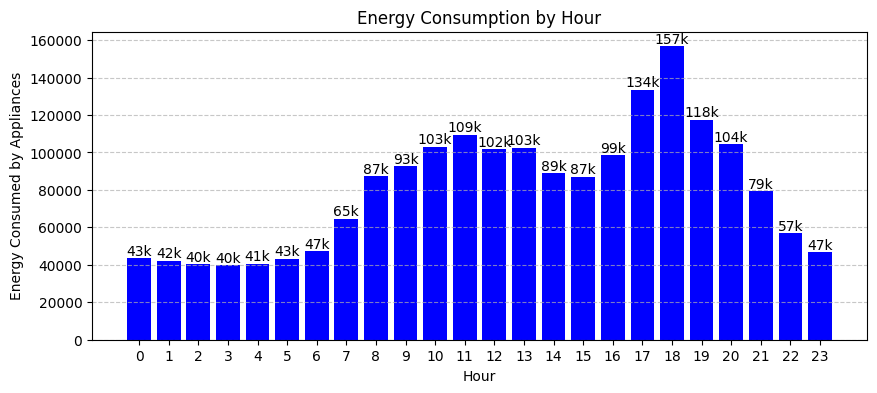

In [14]:
# Function to format the numerical value to 'k' format
def format_value(value):
    if value < 1000:
        return f"{value:.0f}"
    elif value < 10000:
        return f"{value/1000:.1f}k"
    else:
        return f"{value/1000:.0f}k"

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(hour_appliances['hour'], hour_appliances['Appliances'], color='blue')  # Create a bar plot

# Adding numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Hour')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by Hour')  # Set the title
plt.xticks(hour_appliances['hour'])  # Set the x-axis ticks to match the hours
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add gridlines to the y-axis
plt.show()  # Show the plot

Conclusion

The graph above corroborates our hypothesis, demonstrating that electricity consumption is highest between 17:00 and 20:00, and lowest between 23:00 and 06:00 the following day. This corroborates our previous hypothesis, thereby providing further evidence of the reliability of the data.

The distribution of the target variable on weekdays

In [15]:
# Calculate and sort total energy consumed by the appliance per day of the week
app_week_day = df2.groupby('day_of_week')['Appliances'].sum().sort_values(ascending=False).reset_index()
app_week_day

,day_of_week,Appliances
0,0,309610
1,4,297650
2,5,290690
3,3,260450
4,6,259690
5,2,259000
6,1,250920


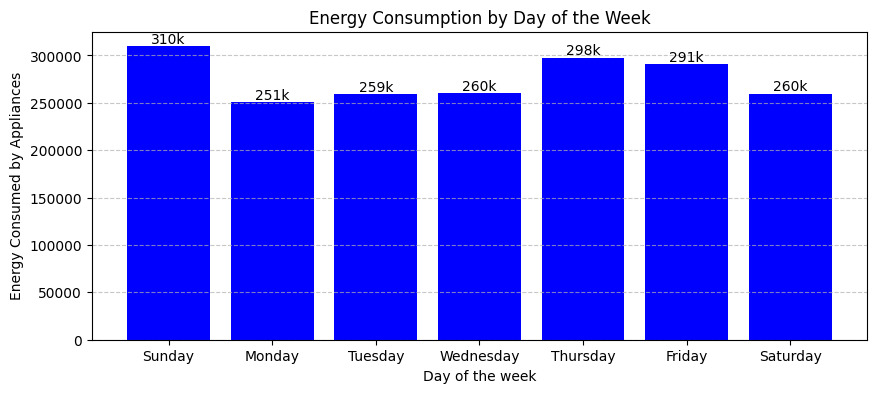

In [16]:
# Dictionary to map day numbers to names
day_names = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

# Plotting the data
plt.figure(figsize=(10, 4))  # Set the figure size
bars = plt.bar(app_week_day['day_of_week'], app_week_day['Appliances'], color='blue')  # Create a bar plot

# Add numerical values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, format_value(height), ha='center', va='bottom')

plt.xlabel('Day of the week')  # Set the x-axis label
plt.ylabel('Energy Consumed by Appliances')  # Set the y-axis label
plt.title('Energy Consumption by Day of the Week')  # Set the title
plt.xticks(ticks=list(day_names.keys()), labels=list(day_names.values()))  # Set x-axis ticks and labels
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding gridlines to the y-axis
plt.show()  # Show the plot

Conclusion

As with the analysis of the hours within a single day, it is possible that a pattern may emerge when the data from an entire week is considered. However, when the data set is split by the day of the week, no significant features emerge in the distribution of the target variable. It is noteworthy that electricity consumption on Sundays is approximately 10% higher than on other days.

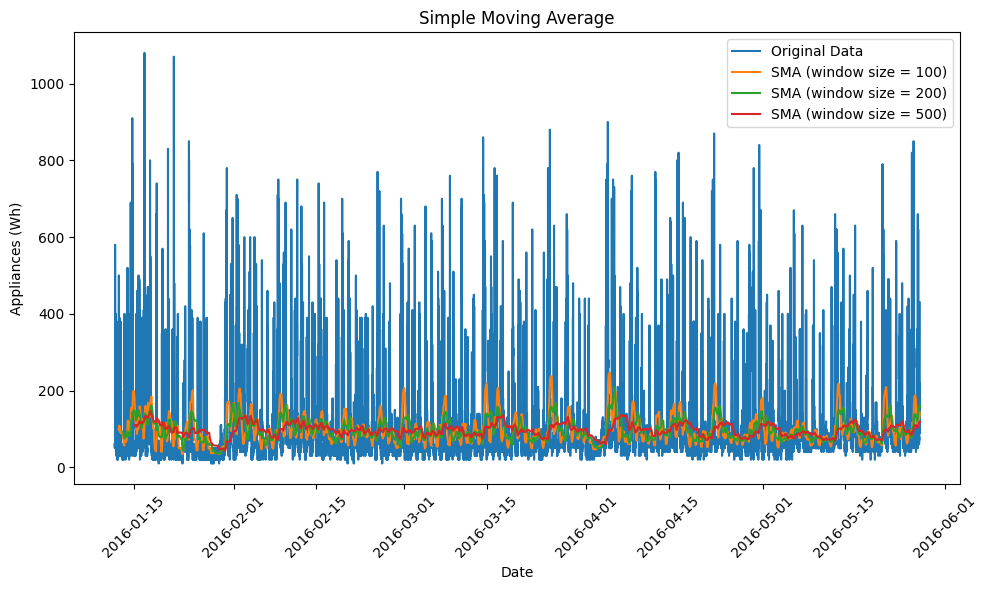

In [17]:
# Window sizes for simple moving averages
window_sizes = [100, 200, 500]

# Calculate SMAs
sma = {w: df['Appliances'].rolling(window=w).mean() for w in window_sizes}

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['Appliances'], label='Original Data')

for w in window_sizes:
    plt.plot(df['date'], sma[w], label=f'SMA (window size = {w})')

plt.xlabel('Date')
plt.ylabel('Appliances (Wh)')
plt.title('Simple Moving Average')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

Conclusion

There is no clear trend in the SMA plot. Appliance usage is stable with minor fluctuations.

Seasonality
The data does not show strong seasonal patterns. There are no obvious cycles or repeating patterns by time of year, month or week.

There are no unusual spikes or drops in appliance usage. The fluctuations are normal.

Correlation analysis

In [18]:
# Drop irrelevant columns
df2 = df2.drop(['Date','Time','rv1', 'rv2'], axis=1)

# Check for non-numeric columns
non_numeric_columns = df2.select_dtypes(exclude=['float64', 'int64']).columns

# Print non-numeric columns, if any
for column in non_numeric_columns:
    print(f"Column '{column}' has non-numeric data type: {df2[column].dtype}")

Column 'hour' has non-numeric data type: int32
Column 'month' has non-numeric data type: int32
Column 'day_of_week' has non-numeric data type: int32
